## LIBRARY

In [1]:
# Importing desired library
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns',50)

## LOAD DATA

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,313601,0.8,0.728457,-1,80,40.0,0.004258,-1.080257,AC,834.0,2155.678440,4655.779025,4879.933800,0.0,6.0,CA,151.0,0.0,BA,0.0,0.0,-1.0,0.0,1000.0,0.0,INTERNET,3.596101,windows,NaN,1.0,0.0,4.0,1
1,461778,0.5,0.858082,-1,272,30.0,0.018662,NaN,NaN,1296.0,8222.396714,6413.223022,5065.417049,5.0,2.0,CA,261.0,0.0,BA,0.0,1.0,25.0,0.0,1000.0,0.0,INTERNET,6.151814,other,0.0,1.0,0.0,NaN,0
2,262345,0.9,0.814606,-1,121,40.0,0.006578,-1.403771,NaN,1471.0,8916.571104,5710.085555,4830.203628,0.0,8.0,CB,168.0,1.0,BA,1.0,0.0,NaN,0.0,1000.0,0.0,INTERNET,4.135402,other,1.0,1.0,0.0,0.0,1
3,229088,0.8,0.730362,-1,40,20.0,0.016866,-1.225565,NaN,3281.0,3021.379314,NaN,4826.835380,2.0,NaN,CA,13.0,1.0,BB,0.0,1.0,NaN,0.0,200.0,0.0,INTERNET,3.394497,windows,0.0,1.0,0.0,0.0,0
4,559991,0.1,0.032931,-1,194,50.0,0.020789,NaN,AB,1493.0,5388.378176,3932.569456,5222.155247,800.0,7.0,CA,273.0,1.0,BA,0.0,1.0,25.0,0.0,990.0,0.0,INTERNET,4.737753,windows,1.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083756,156060,0.9,0.621686,-1,263,20.0,0.003981,-0.506858,AB,1065.0,4020.175029,5194.955108,4367.981062,9.0,NaN,CA,211.0,1.0,BE,0.0,1.0,2.0,1.0,1500.0,0.0,INTERNET,5.647597,windows,1.0,1.0,0.0,5.0,0
1083757,416819,0.3,0.203487,-1,119,30.0,NaN,-1.016709,NaN,1196.0,4941.170871,3717.280295,4393.482498,1.0,3.0,NaN,114.0,1.0,BD,NaN,1.0,1.0,0.0,200.0,NaN,INTERNET,5.180051,linux,1.0,1.0,0.0,5.0,0
1083758,954737,0.9,0.118512,-1,134,50.0,0.021271,0.024437,AD,1216.0,1839.138470,3563.951256,3086.860087,152.0,5.0,CA,215.0,0.0,BB,1.0,1.0,NaN,1.0,500.0,0.0,INTERNET,3.182414,other,NaN,1.0,0.0,6.0,0
1083759,265897,0.1,0.909544,-1,144,30.0,0.005345,26.620659,AA,1159.0,8401.412339,5878.050992,5487.520603,548.0,13.0,CA,193.0,1.0,BB,0.0,1.0,28.0,1.0,1500.0,0.0,INTERNET,6.253071,NaN,0.0,1.0,0.0,2.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083761 entries, 0 to 1083760
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1083761 non-null  int64  
 1   income                        1006395 non-null  float64
 2   email_similarity              1062827 non-null  float64
 3   address_months_count          1083761 non-null  int64  
 4   current_address_months_count  1083761 non-null  int64  
 5   age                           1035122 non-null  float64
 6   days_request                  986424 non-null   float64
 7   initial_amount                931110 non-null   float64
 8   payment                       981326 non-null   object 
 9   zip_count                     1024860 non-null  float64
 10  app_6h                        1024294 non-null  float64
 11  app_24h                       931552 non-null   float64
 12  app_4w                      

In [5]:
#Numeric
numeric = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64')].columns.tolist()
numeric

['id',
 'income',
 'email_similarity',
 'address_months_count',
 'current_address_months_count',
 'age',
 'days_request',
 'initial_amount',
 'zip_count',
 'app_6h',
 'app_24h',
 'app_4w',
 'total_app_8w',
 'distinct_birth_emails',
 'credit_score',
 'email_status',
 'phone_status',
 'mobile_status',
 'bank_months',
 'other_cards',
 'credit_limit',
 'foreign',
 'session_length',
 'keep_alive',
 'distinct_device_emails',
 'device_fraud',
 'month_of_application',
 'fraud']

In [6]:
df[numeric].describe()

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,credit_score,email_status,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,session_length,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
count,1.083761e+06,1.006395e+06,1.062827e+06,1.083761e+06,1.083761e+06,1.035122e+06,9.864240e+05,931110.000000,1.024860e+06,1.024294e+06,931552.000000,1.036744e+06,1.042953e+06,970927.000000,995640.000000,1.033596e+06,1.015209e+06,1.017096e+06,923654.000000,1.060694e+06,1.063777e+06,1.015900e+06,1.039175e+06,967884.000000,1.044473e+06,984854.0,1.032058e+06,1.083761e+06
mean,5.118783e+05,5.835052e-01,4.765529e-01,1.487872e+01,9.137767e+01,3.490108e+01,1.023847e+00,7.850067,1.580703e+03,5.583685e+03,4743.438160,4.840069e+03,1.755652e+02,9.160090,138.921574,5.520165e-01,3.895828e-01,8.832883e-01,10.788674,2.000511e-01,5.700309e+02,2.957181e-02,7.660322e+00,0.537407,1.028745e+00,0.0,3.335004e+00,1.786030e-01
std,2.955529e+05,2.900324e-01,2.926227e-01,4.261140e+01,8.851437e+01,1.250546e+01,5.403606e+00,19.731204,1.004731e+03,2.995009e+03,1473.357597,9.299823e+02,4.526760e+02,5.061604,74.048212,4.972872e-01,4.876559e-01,3.210766e-01,12.251464,4.000385e-01,5.309501e+02,1.694029e-01,8.339124e+00,0.498599,2.124765e-01,0.0,2.228973e+00,3.830197e-01
min,1.000000e+00,1.000000e-01,1.434550e-06,-1.000000e+00,-1.000000e+00,1.000000e+01,4.036860e-09,-15.530555,1.000000e+00,-1.706031e+02,1320.283991,2.825748e+03,0.000000e+00,0.000000,-170.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00,1.900000e+02,0.000000e+00,-1.000000e+00,0.000000,-1.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,2.559190e+05,3.000000e-01,2.014414e-01,-1.000000e+00,2.500000e+01,3.000000e+01,6.961298e-03,-1.183215,8.980000e+02,3.353539e+03,3562.277425,4.256893e+03,1.000000e+00,5.000000,86.000000,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000,0.000000e+00,2.000000e+02,0.000000e+00,3.131265e+00,0.000000,1.000000e+00,0.0,1.000000e+00,0.000000e+00
50%,5.119210e+05,7.000000e-01,4.686943e-01,-1.000000e+00,6.000000e+01,3.000000e+01,1.480146e-02,-0.843259,1.273000e+03,5.241993e+03,4733.225392,4.897151e+03,9.000000e+00,8.000000,129.000000,1.000000e+00,0.000000e+00,1.000000e+00,5.000000,0.000000e+00,2.000000e+02,0.000000e+00,5.116036e+00,1.000000,1.000000e+00,0.0,3.000000e+00,0.000000e+00
75%,7.678280e+05,9.000000e-01,7.446959e-01,8.000000e+00,1.360000e+02,4.000000e+01,2.590881e-02,-0.262407,1.961000e+03,7.591947e+03,5725.204542,5.479563e+03,2.200000e+01,12.000000,189.000000,1.000000e+00,1.000000e+00,1.000000e+00,25.000000,0.000000e+00,1.000000e+03,0.000000e+00,8.821385e+00,1.000000,1.000000e+00,0.0,5.000000e+00,0.000000e+00
max,1.023690e+06,9.000000e-01,9.999993e-01,3.830000e+02,4.280000e+02,9.000000e+01,7.845690e+01,112.956928,6.700000e+03,1.671557e+04,9506.896596,6.994764e+03,2.385000e+03,39.000000,389.000000,1.000000e+00,1.000000e+00,1.000000e+00,32.000000,1.000000e+00,2.100000e+03,1.000000e+00,8.589914e+01,1.000000,2.000000e+00,0.0,7.000000e+00,1.000000e+00


In [7]:
#Categorical
categorical = df.loc[:, df.dtypes==object].columns.tolist()
categorical

['payment', 'employment', 'housing', 'source_of_application', 'os']

In [8]:
df[categorical].describe()

,payment,employment,housing,source_of_application,os
count,981326,1054002,993417,1063696,1002282
unique,5,7,7,2,5
top,AB,CA,BC,INTERNET,windows
freq,365399,783159,342002,1055641,320028


# 1. Exploratory and Visualization Data (EDA)

## Encoding Categorical Data to Numerik

In [9]:
# Encoding several categorical features into integer using OrdinalEncoder from sklearn.preprocessing class
enc = OrdinalEncoder()
df[['payment','employment','housing','source_of_application','os']] = enc.fit_transform(df[['payment','employment','housing','source_of_application','os']])

In [10]:
df

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,313601,0.8,0.728457,-1,80,40.0,0.004258,-1.080257,2.0,834.0,2155.678440,4655.779025,4879.933800,0.0,6.0,0.0,151.0,0.0,0.0,0.0,0.0,-1.0,0.0,1000.0,0.0,0.0,3.596101,3.0,NaN,1.0,0.0,4.0,1
1,461778,0.5,0.858082,-1,272,30.0,0.018662,NaN,NaN,1296.0,8222.396714,6413.223022,5065.417049,5.0,2.0,0.0,261.0,0.0,0.0,0.0,1.0,25.0,0.0,1000.0,0.0,0.0,6.151814,2.0,0.0,1.0,0.0,NaN,0
2,262345,0.9,0.814606,-1,121,40.0,0.006578,-1.403771,NaN,1471.0,8916.571104,5710.085555,4830.203628,0.0,8.0,1.0,168.0,1.0,0.0,1.0,0.0,NaN,0.0,1000.0,0.0,0.0,4.135402,2.0,1.0,1.0,0.0,0.0,1
3,229088,0.8,0.730362,-1,40,20.0,0.016866,-1.225565,NaN,3281.0,3021.379314,NaN,4826.835380,2.0,NaN,0.0,13.0,1.0,1.0,0.0,1.0,NaN,0.0,200.0,0.0,0.0,3.394497,3.0,0.0,1.0,0.0,0.0,0
4,559991,0.1,0.032931,-1,194,50.0,0.020789,NaN,1.0,1493.0,5388.378176,3932.569456,5222.155247,800.0,7.0,0.0,273.0,1.0,0.0,0.0,1.0,25.0,0.0,990.0,0.0,0.0,4.737753,3.0,1.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083756,156060,0.9,0.621686,-1,263,20.0,0.003981,-0.506858,1.0,1065.0,4020.175029,5194.955108,4367.981062,9.0,NaN,0.0,211.0,1.0,4.0,0.0,1.0,2.0,1.0,1500.0,0.0,0.0,5.647597,3.0,1.0,1.0,0.0,5.0,0
1083757,416819,0.3,0.203487,-1,119,30.0,NaN,-1.016709,NaN,1196.0,4941.170871,3717.280295,4393.482498,1.0,3.0,NaN,114.0,1.0,3.0,NaN,1.0,1.0,0.0,200.0,NaN,0.0,5.180051,0.0,1.0,1.0,0.0,5.0,0
1083758,954737,0.9,0.118512,-1,134,50.0,0.021271,0.024437,3.0,1216.0,1839.138470,3563.951256,3086.860087,152.0,5.0,0.0,215.0,0.0,1.0,1.0,1.0,NaN,1.0,500.0,0.0,0.0,3.182414,2.0,NaN,1.0,0.0,6.0,0
1083759,265897,0.1,0.909544,-1,144,30.0,0.005345,26.620659,0.0,1159.0,8401.412339,5878.050992,5487.520603,548.0,13.0,0.0,193.0,1.0,1.0,0.0,1.0,28.0,1.0,1500.0,0.0,0.0,6.253071,NaN,0.0,1.0,0.0,2.0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083761 entries, 0 to 1083760
Data columns (total 33 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id                            1083761 non-null  int64  
 1   income                        1006395 non-null  float64
 2   email_similarity              1062827 non-null  float64
 3   address_months_count          1083761 non-null  int64  
 4   current_address_months_count  1083761 non-null  int64  
 5   age                           1035122 non-null  float64
 6   days_request                  986424 non-null   float64
 7   initial_amount                931110 non-null   float64
 8   payment                       981326 non-null   float64
 9   zip_count                     1024860 non-null  float64
 10  app_6h                        1024294 non-null  float64
 11  app_24h                       931552 non-null   float64
 12  app_4w                      

In [12]:
df['source_of_application'].unique()

array([ 0., nan,  1.])

## HAETMAP CORRELATION

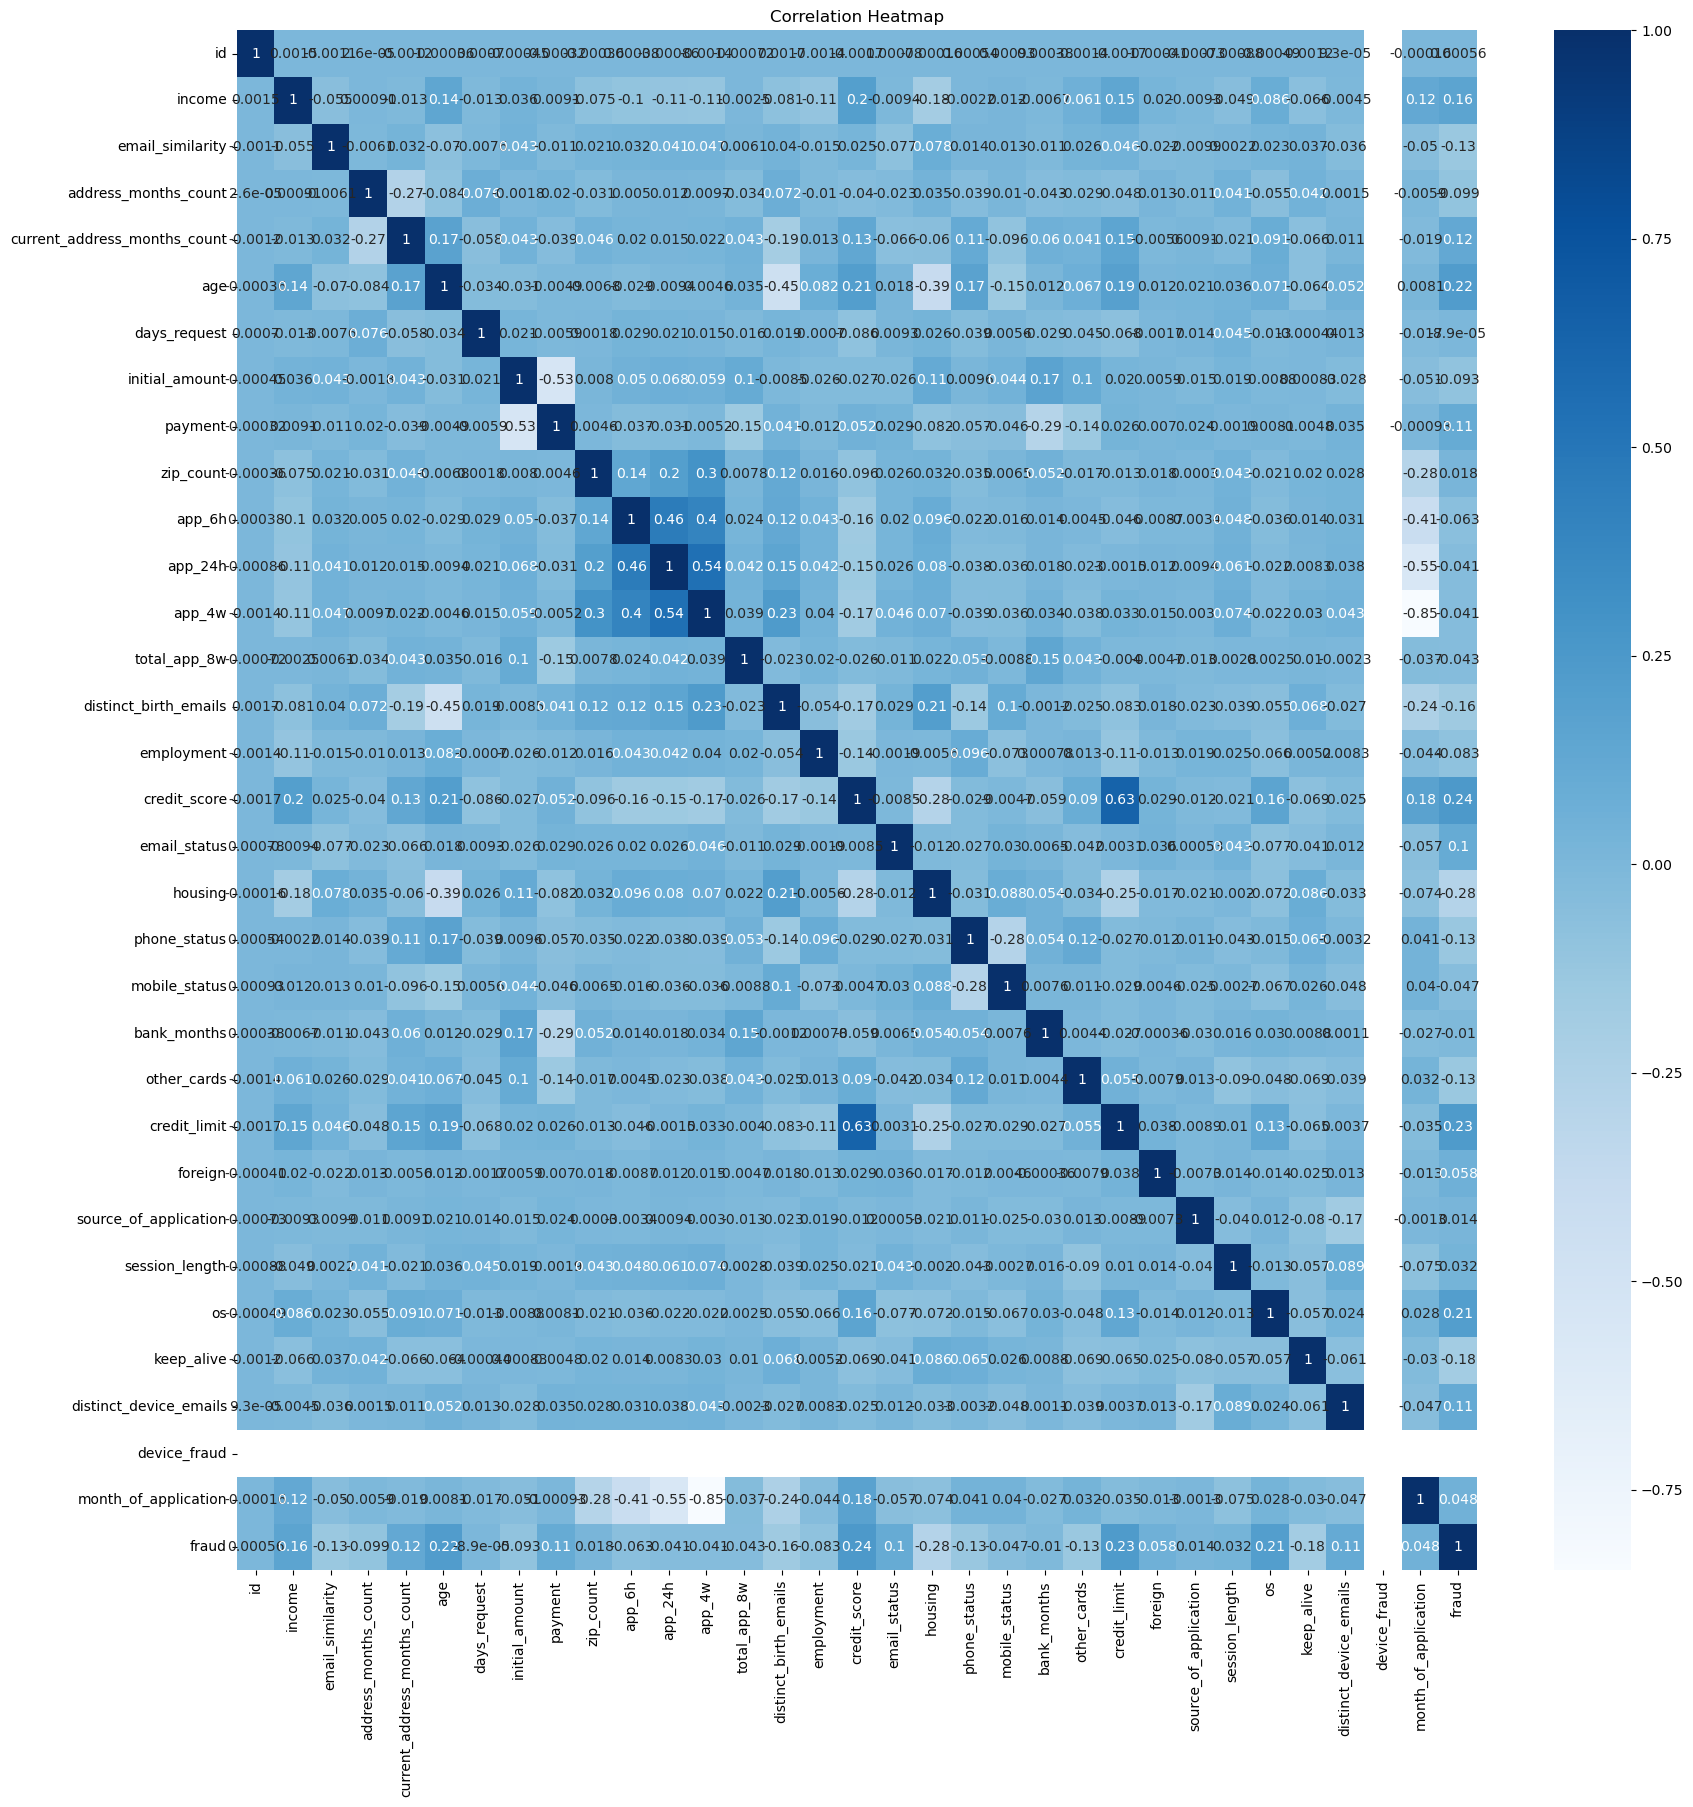

In [13]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# DATA PREPROCESSING

In [14]:
df_clean = df.copy()

In [15]:
df_clean

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,313601,0.8,0.728457,-1,80,40.0,0.004258,-1.080257,2.0,834.0,2155.678440,4655.779025,4879.933800,0.0,6.0,0.0,151.0,0.0,0.0,0.0,0.0,-1.0,0.0,1000.0,0.0,0.0,3.596101,3.0,NaN,1.0,0.0,4.0,1
1,461778,0.5,0.858082,-1,272,30.0,0.018662,NaN,NaN,1296.0,8222.396714,6413.223022,5065.417049,5.0,2.0,0.0,261.0,0.0,0.0,0.0,1.0,25.0,0.0,1000.0,0.0,0.0,6.151814,2.0,0.0,1.0,0.0,NaN,0
2,262345,0.9,0.814606,-1,121,40.0,0.006578,-1.403771,NaN,1471.0,8916.571104,5710.085555,4830.203628,0.0,8.0,1.0,168.0,1.0,0.0,1.0,0.0,NaN,0.0,1000.0,0.0,0.0,4.135402,2.0,1.0,1.0,0.0,0.0,1
3,229088,0.8,0.730362,-1,40,20.0,0.016866,-1.225565,NaN,3281.0,3021.379314,NaN,4826.835380,2.0,NaN,0.0,13.0,1.0,1.0,0.0,1.0,NaN,0.0,200.0,0.0,0.0,3.394497,3.0,0.0,1.0,0.0,0.0,0
4,559991,0.1,0.032931,-1,194,50.0,0.020789,NaN,1.0,1493.0,5388.378176,3932.569456,5222.155247,800.0,7.0,0.0,273.0,1.0,0.0,0.0,1.0,25.0,0.0,990.0,0.0,0.0,4.737753,3.0,1.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083756,156060,0.9,0.621686,-1,263,20.0,0.003981,-0.506858,1.0,1065.0,4020.175029,5194.955108,4367.981062,9.0,NaN,0.0,211.0,1.0,4.0,0.0,1.0,2.0,1.0,1500.0,0.0,0.0,5.647597,3.0,1.0,1.0,0.0,5.0,0
1083757,416819,0.3,0.203487,-1,119,30.0,NaN,-1.016709,NaN,1196.0,4941.170871,3717.280295,4393.482498,1.0,3.0,NaN,114.0,1.0,3.0,NaN,1.0,1.0,0.0,200.0,NaN,0.0,5.180051,0.0,1.0,1.0,0.0,5.0,0
1083758,954737,0.9,0.118512,-1,134,50.0,0.021271,0.024437,3.0,1216.0,1839.138470,3563.951256,3086.860087,152.0,5.0,0.0,215.0,0.0,1.0,1.0,1.0,NaN,1.0,500.0,0.0,0.0,3.182414,2.0,NaN,1.0,0.0,6.0,0
1083759,265897,0.1,0.909544,-1,144,30.0,0.005345,26.620659,0.0,1159.0,8401.412339,5878.050992,5487.520603,548.0,13.0,0.0,193.0,1.0,1.0,0.0,1.0,28.0,1.0,1500.0,0.0,0.0,6.253071,NaN,0.0,1.0,0.0,2.0,0


In [16]:
# Encoding several categorical features into integer using OrdinalEncoder from sklearn.preprocessing class
enc = OrdinalEncoder()
df_clean[['payment','employment','housing','source_of_application','os']] = enc.fit_transform(df_clean[['payment','employment','housing','source_of_application','os']])

### Checking NA

In [17]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,bank_months,160107,14.773
1,initial_amount,152651,14.085
2,app_24h,152209,14.045
3,keep_alive,115877,10.692
4,distinct_birth_emails,112834,10.411
5,payment,102435,9.452
6,device_fraud,98907,9.126
7,days_request,97337,8.981
8,housing,90344,8.336
9,credit_score,88121,8.131


In [18]:
col_missing_value = data_missing_value['feature'].tolist() 
df_clean[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083761 entries, 0 to 1083760
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   bank_months             923654 non-null   float64
 1   initial_amount          931110 non-null   float64
 2   app_24h                 931552 non-null   float64
 3   keep_alive              967884 non-null   float64
 4   distinct_birth_emails   970927 non-null   float64
 5   payment                 981326 non-null   float64
 6   device_fraud            984854 non-null   float64
 7   days_request            986424 non-null   float64
 8   housing                 993417 non-null   float64
 9   credit_score            995640 non-null   float64
 10  os                      1002282 non-null  float64
 11  income                  1006395 non-null  float64
 12  phone_status            1015209 non-null  float64
 13  foreign                 1015900 non-null  float64
 14  mo

### Data Cleaning

In [19]:
df_clean.shape

(1083761, 33)

In [20]:
df_clean.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1083756    False
1083757    False
1083758    False
1083759    False
1083760     True
Length: 1083761, dtype: bool

In [21]:
df_clean= df_clean.drop_duplicates()

In [22]:
df_clean

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application,fraud
0,313601,0.8,0.728457,-1,80,40.0,0.004258,-1.080257,2.0,834.0,2155.678440,4655.779025,4879.933800,0.0,6.0,0.0,151.0,0.0,0.0,0.0,0.0,-1.0,0.0,1000.0,0.0,0.0,3.596101,3.0,NaN,1.0,0.0,4.0,1
1,461778,0.5,0.858082,-1,272,30.0,0.018662,NaN,NaN,1296.0,8222.396714,6413.223022,5065.417049,5.0,2.0,0.0,261.0,0.0,0.0,0.0,1.0,25.0,0.0,1000.0,0.0,0.0,6.151814,2.0,0.0,1.0,0.0,NaN,0
2,262345,0.9,0.814606,-1,121,40.0,0.006578,-1.403771,NaN,1471.0,8916.571104,5710.085555,4830.203628,0.0,8.0,1.0,168.0,1.0,0.0,1.0,0.0,NaN,0.0,1000.0,0.0,0.0,4.135402,2.0,1.0,1.0,0.0,0.0,1
3,229088,0.8,0.730362,-1,40,20.0,0.016866,-1.225565,NaN,3281.0,3021.379314,NaN,4826.835380,2.0,NaN,0.0,13.0,1.0,1.0,0.0,1.0,NaN,0.0,200.0,0.0,0.0,3.394497,3.0,0.0,1.0,0.0,0.0,0
4,559991,0.1,0.032931,-1,194,50.0,0.020789,NaN,1.0,1493.0,5388.378176,3932.569456,5222.155247,800.0,7.0,0.0,273.0,1.0,0.0,0.0,1.0,25.0,0.0,990.0,0.0,0.0,4.737753,3.0,1.0,1.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083755,701608,NaN,0.486626,62,1,30.0,0.017652,NaN,2.0,623.0,6271.787489,2237.726776,3171.060430,0.0,7.0,0.0,NaN,1.0,1.0,0.0,1.0,-1.0,0.0,200.0,0.0,NaN,6.110247,0.0,0.0,1.0,0.0,7.0,0
1083756,156060,0.9,0.621686,-1,263,20.0,0.003981,-0.506858,1.0,1065.0,4020.175029,5194.955108,4367.981062,9.0,NaN,0.0,211.0,1.0,4.0,0.0,1.0,2.0,1.0,1500.0,0.0,0.0,5.647597,3.0,1.0,1.0,0.0,5.0,0
1083757,416819,0.3,0.203487,-1,119,30.0,NaN,-1.016709,NaN,1196.0,4941.170871,3717.280295,4393.482498,1.0,3.0,NaN,114.0,1.0,3.0,NaN,1.0,1.0,0.0,200.0,NaN,0.0,5.180051,0.0,1.0,1.0,0.0,5.0,0
1083758,954737,0.9,0.118512,-1,134,50.0,0.021271,0.024437,3.0,1216.0,1839.138470,3563.951256,3086.860087,152.0,5.0,0.0,215.0,0.0,1.0,1.0,1.0,NaN,1.0,500.0,0.0,0.0,3.182414,2.0,NaN,1.0,0.0,6.0,0


## Handling NA

In [23]:
# replace NaN with most frequent value
for col in numeric:
  df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

C:\Users\putri\AppData\Local\Temp\ipykernel_11708\4240322237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(df_clean[col].mean())


In [24]:
for col in categorical:
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])

C:\Users\putri\AppData\Local\Temp\ipykernel_11708\1474765748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])
C:\Users\putri\AppData\Local\Temp\ipykernel_11708\1474765748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])
C:\Users\putri\AppData\Local\Temp\ipykernel_11708\1474765748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [25]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,id,0
1,income,0
2,email_similarity,0
3,address_months_count,0
4,current_address_months_count,0
5,age,0
6,days_request,0
7,initial_amount,0
8,payment,0
9,zip_count,0


In [26]:
df_clean['address_months_count'] = df_clean['address_months_count'].replace(-1, 0)


C:\Users\putri\AppData\Local\Temp\ipykernel_11708\1753194625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['address_months_count'] = df_clean['address_months_count'].replace(-1, 0)


In [27]:
df_clean= df_clean.drop(columns='device_fraud')

In [28]:
df_clean

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,month_of_application,fraud
0,313601,0.800000,0.728457,0,80,40.0,0.004258,-1.080257,2.0,834.0,2155.678440,4655.779025,4879.933800,0.0,6.000000,0.0,151.000000,0.0,0.0,0.000000,0.0,-1.00000,0.0,1000.0,0.000000,0.0,3.596101,3.0,0.548828,1.0,4.000000,1
1,461778,0.500000,0.858082,0,272,30.0,0.018662,8.082096,1.0,1296.0,8222.396714,6413.223022,5065.417049,5.0,2.000000,0.0,261.000000,0.0,0.0,0.000000,1.0,25.00000,0.0,1000.0,0.000000,0.0,6.151814,2.0,0.000000,1.0,3.321391,0
2,262345,0.900000,0.814606,0,121,40.0,0.006578,-1.403771,1.0,1471.0,8916.571104,5710.085555,4830.203628,0.0,8.000000,1.0,168.000000,1.0,0.0,1.000000,0.0,10.80636,0.0,1000.0,0.000000,0.0,4.135402,2.0,1.000000,1.0,0.000000,1
3,229088,0.800000,0.730362,0,40,20.0,0.016866,-1.225565,1.0,3281.0,3021.379314,4751.134904,4826.835380,2.0,9.259193,0.0,13.000000,1.0,1.0,0.000000,1.0,10.80636,0.0,200.0,0.000000,0.0,3.394497,3.0,0.000000,1.0,0.000000,0
4,559991,0.100000,0.032931,0,194,50.0,0.020789,8.082096,1.0,1493.0,5388.378176,3932.569456,5222.155247,800.0,7.000000,0.0,273.000000,1.0,0.0,0.000000,1.0,25.00000,0.0,990.0,0.000000,0.0,4.737753,3.0,1.000000,1.0,2.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083755,701608,0.577617,0.486626,62,1,30.0,0.017652,8.082096,2.0,623.0,6271.787489,2237.726776,3171.060430,0.0,7.000000,0.0,136.648649,1.0,1.0,0.000000,1.0,-1.00000,0.0,200.0,0.000000,0.0,6.110247,0.0,0.000000,1.0,7.000000,0
1083756,156060,0.900000,0.621686,0,263,20.0,0.003981,-0.506858,1.0,1065.0,4020.175029,5194.955108,4367.981062,9.0,9.259193,0.0,211.000000,1.0,4.0,0.000000,1.0,2.00000,1.0,1500.0,0.000000,0.0,5.647597,3.0,1.000000,1.0,5.000000,0
1083757,416819,0.300000,0.203487,0,119,30.0,1.023858,-1.016709,1.0,1196.0,4941.170871,3717.280295,4393.482498,1.0,3.000000,0.0,114.000000,1.0,3.0,0.397407,1.0,1.00000,0.0,200.0,0.028325,0.0,5.180051,0.0,1.000000,1.0,5.000000,0
1083758,954737,0.900000,0.118512,0,134,50.0,0.021271,0.024437,3.0,1216.0,1839.138470,3563.951256,3086.860087,152.0,5.000000,0.0,215.000000,0.0,1.0,1.000000,1.0,10.80636,1.0,500.0,0.000000,0.0,3.182414,2.0,0.548828,1.0,6.000000,0


In [29]:
X= df_clean.iloc[:, 0:31]
X

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,month_of_application
0,313601,0.800000,0.728457,0,80,40.0,0.004258,-1.080257,2.0,834.0,2155.678440,4655.779025,4879.933800,0.0,6.000000,0.0,151.000000,0.0,0.0,0.000000,0.0,-1.00000,0.0,1000.0,0.000000,0.0,3.596101,3.0,0.548828,1.0,4.000000
1,461778,0.500000,0.858082,0,272,30.0,0.018662,8.082096,1.0,1296.0,8222.396714,6413.223022,5065.417049,5.0,2.000000,0.0,261.000000,0.0,0.0,0.000000,1.0,25.00000,0.0,1000.0,0.000000,0.0,6.151814,2.0,0.000000,1.0,3.321391
2,262345,0.900000,0.814606,0,121,40.0,0.006578,-1.403771,1.0,1471.0,8916.571104,5710.085555,4830.203628,0.0,8.000000,1.0,168.000000,1.0,0.0,1.000000,0.0,10.80636,0.0,1000.0,0.000000,0.0,4.135402,2.0,1.000000,1.0,0.000000
3,229088,0.800000,0.730362,0,40,20.0,0.016866,-1.225565,1.0,3281.0,3021.379314,4751.134904,4826.835380,2.0,9.259193,0.0,13.000000,1.0,1.0,0.000000,1.0,10.80636,0.0,200.0,0.000000,0.0,3.394497,3.0,0.000000,1.0,0.000000
4,559991,0.100000,0.032931,0,194,50.0,0.020789,8.082096,1.0,1493.0,5388.378176,3932.569456,5222.155247,800.0,7.000000,0.0,273.000000,1.0,0.0,0.000000,1.0,25.00000,0.0,990.0,0.000000,0.0,4.737753,3.0,1.000000,1.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083755,701608,0.577617,0.486626,62,1,30.0,0.017652,8.082096,2.0,623.0,6271.787489,2237.726776,3171.060430,0.0,7.000000,0.0,136.648649,1.0,1.0,0.000000,1.0,-1.00000,0.0,200.0,0.000000,0.0,6.110247,0.0,0.000000,1.0,7.000000
1083756,156060,0.900000,0.621686,0,263,20.0,0.003981,-0.506858,1.0,1065.0,4020.175029,5194.955108,4367.981062,9.0,9.259193,0.0,211.000000,1.0,4.0,0.000000,1.0,2.00000,1.0,1500.0,0.000000,0.0,5.647597,3.0,1.000000,1.0,5.000000
1083757,416819,0.300000,0.203487,0,119,30.0,1.023858,-1.016709,1.0,1196.0,4941.170871,3717.280295,4393.482498,1.0,3.000000,0.0,114.000000,1.0,3.0,0.397407,1.0,1.00000,0.0,200.0,0.028325,0.0,5.180051,0.0,1.000000,1.0,5.000000
1083758,954737,0.900000,0.118512,0,134,50.0,0.021271,0.024437,3.0,1216.0,1839.138470,3563.951256,3086.860087,152.0,5.000000,0.0,215.000000,0.0,1.0,1.000000,1.0,10.80636,1.0,500.0,0.000000,0.0,3.182414,2.0,0.548828,1.0,6.000000


In [30]:
y = df_clean['fraud']

In [31]:
y

0          1
1          0
2          1
3          0
4          1
          ..
1083755    0
1083756    0
1083757    0
1083758    0
1083759    0
Name: fraud, Length: 1023690, dtype: int64

# MODEL

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Metrics evaluasi
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [33]:
'''# Create function to automate model training
def train_model(X_train, y_train):
    # list of base_estimator 
    base_estim = [RandomForestClassifier(),RidgeClassifier(), MLPClassifier()] #masukking fungsinya contoh LinearRegression()
    # Create empty list to store auc_score
    f1 = []

    # Loop through list of models
    for model in base_estim:
        estimator = model
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_train)

        f1.append(f1_score(y_train, y_pred))
       
    # Create dictionary to store scores
    result = {
        "Model" : ['RandomForestClassifier','RidgeClassifie','MLPClassifier'], # isiin sesuai element dari base_estim tapi tanpa () dan berbentuk string. Contoh ['LinearRegression', ...]
        "F1_Score" : f1
    }

    # Return dataframe
    return pd.DataFrame(result)

'''

'# Create function to automate model training\ndef train_model(X_train, y_train):\n    # list of base_estimator \n    base_estim = [RandomForestClassifier(),RidgeClassifier(), MLPClassifier()] #masukking fungsinya contoh LinearRegression()\n    # Create empty list to store auc_score\n    f1 = []\n\n    # Loop through list of models\n    for model in base_estim:\n        estimator = model\n        estimator.fit(X_train, y_train)\n        y_pred = estimator.predict(X_train)\n\n        f1.append(f1_score(y_train, y_pred))\n       \n    # Create dictionary to store scores\n    result = {\n        "Model" : [\'RandomForestClassifier\',\'RidgeClassifie\',\'MLPClassifier\'], # isiin sesuai element dari base_estim tapi tanpa () dan berbentuk string. Contoh [\'LinearRegression\', ...]\n        "F1_Score" : f1\n    }\n\n    # Return dataframe\n    return pd.DataFrame(result)\n\n'

In [34]:
'''table = train_model(X, y)
table

'''

'table = train_model(X, y)\ntable\n\n'

In [35]:
model= RandomForestClassifier(n_estimators=100) # model_name contoh LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(f1_score(y, y_pred))

0.9999925088582751


# PREPROCESSING DF TEST

In [36]:
# Importing desired library
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [37]:
df_test = pd.read_csv('Test.csv')

In [38]:
df_test

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application
0,1023691,0.2,0.902738,-1,94,20.0,0.012972,-0.696217,AD,1890.0,9145.627240,7545.282661,5611.397155,1337.0,12.0,CA,118.0,1.0,NaN,0.0,1.0,1.0,0.0,200.0,0.0,INTERNET,NaN,windows,1.0,1.0,0.0,2.0
1,1023692,0.8,0.068936,12,7,80.0,0.002745,-1.749271,AC,3360.0,3420.361344,4806.102811,4267.817743,0.0,2.0,CC,133.0,1.0,BC,0.0,1.0,31.0,0.0,200.0,0.0,INTERNET,NaN,x11,0.0,2.0,0.0,5.0
2,1023693,0.9,0.892004,-1,109,40.0,0.011651,-0.902890,AC,349.0,1322.885361,2718.138703,3141.958118,0.0,8.0,CA,311.0,0.0,BA,0.0,1.0,-1.0,0.0,990.0,0.0,INTERNET,5.883192,windows,1.0,1.0,0.0,7.0
3,1023694,0.9,0.187667,-1,34,50.0,0.018405,-0.994445,AB,975.0,5837.567525,5553.808379,4321.857753,1792.0,3.0,CC,125.0,1.0,BB,1.0,0.0,2.0,1.0,200.0,0.0,INTERNET,6.230800,windows,1.0,1.0,0.0,4.0
4,1023695,0.6,0.097141,-1,36,40.0,0.034658,-1.582350,AD,3681.0,8286.889812,5503.118114,6323.894793,10.0,12.0,CA,114.0,NaN,BA,0.0,1.0,19.0,0.0,200.0,0.0,INTERNET,2.374713,other,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286798,1193289,0.9,0.992685,-1,65,40.0,0.020114,-0.654129,AB,575.0,1235.991785,4589.035553,6358.144652,16.0,4.0,CA,71.0,1.0,BA,1.0,1.0,30.0,0.0,200.0,0.0,INTERNET,0.404337,other,0.0,1.0,0.0,5.0
286799,1144316,0.3,0.818686,-1,66,30.0,0.013522,-0.736241,AB,726.0,3996.166709,4699.971708,4883.269371,9.0,NaN,CA,196.0,0.0,BA,0.0,1.0,10.0,0.0,1000.0,0.0,INTERNET,4.734496,macintosh,1.0,1.0,0.0,4.0
286800,1101399,0.9,0.156550,-1,129,30.0,0.003886,-1.213933,AB,1093.0,883.072714,4239.813754,4353.678740,10.0,4.0,CA,100.0,1.0,BA,0.0,1.0,30.0,0.0,200.0,0.0,INTERNET,2.312049,linux,1.0,1.0,0.0,5.0
286801,1047136,0.9,0.356654,-1,106,40.0,0.015947,-0.581019,AB,403.0,2851.493604,3296.784752,3946.432361,1546.0,4.0,NaN,223.0,1.0,BA,0.0,1.0,28.0,0.0,500.0,0.0,INTERNET,4.976841,linux,1.0,1.0,NaN,6.0


In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286803 entries, 0 to 286802
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            286803 non-null  int64  
 1   income                        278205 non-null  float64
 2   email_similarity              276210 non-null  float64
 3   address_months_count          286803 non-null  int64  
 4   current_address_months_count  286803 non-null  int64  
 5   age                           283195 non-null  float64
 6   days_request                  277455 non-null  float64
 7   initial_amount                275867 non-null  float64
 8   payment                       281879 non-null  object 
 9   zip_count                     277314 non-null  float64
 10  app_6h                        276594 non-null  float64
 11  app_24h                       278339 non-null  float64
 12  app_4w                        281762 non-nul

In [40]:
#Numeric
numeric_test = df_test.loc[:, (df_test.dtypes == 'int64') | (df_test.dtypes == 'float64')].columns.tolist()
numeric_test

['id',
 'income',
 'email_similarity',
 'address_months_count',
 'current_address_months_count',
 'age',
 'days_request',
 'initial_amount',
 'zip_count',
 'app_6h',
 'app_24h',
 'app_4w',
 'total_app_8w',
 'distinct_birth_emails',
 'credit_score',
 'email_status',
 'phone_status',
 'mobile_status',
 'bank_months',
 'other_cards',
 'credit_limit',
 'foreign',
 'session_length',
 'keep_alive',
 'distinct_device_emails',
 'device_fraud',
 'month_of_application']

In [41]:
df_test[numeric_test].describe()

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,credit_score,email_status,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,session_length,keep_alive,distinct_device_emails,device_fraud,month_of_application
count,2.868030e+05,278205.000000,276210.000000,286803.000000,286803.000000,283195.000000,2.774550e+05,275867.000000,277314.000000,276594.000000,278339.000000,281762.000000,274329.000000,282527.000000,275255.000000,274502.000000,281217.000000,279559.000000,280252.000000,276582.000000,280527.000000,274609.000000,279290.000000,281372.000000,279623.000000,274938.0,275848.000000
mean,1.122559e+06,0.623413,0.443749,11.324411,100.460686,37.247021,1.041498e+00,6.227122,1598.393597,5412.927873,4689.906371,4806.795459,159.615484,8.492940,154.037623,0.596484,0.335044,0.869863,10.588870,0.152450,673.537378,0.038247,7.900837,0.460597,1.048980,0.0,3.428794
std,5.713257e+04,0.285584,0.296888,39.171316,87.806418,13.090167,5.583695e+00,18.477586,1010.899494,2968.754664,1463.456689,951.617948,439.603754,5.050964,79.463144,0.490603,0.472007,0.336455,12.479779,0.359457,592.343484,0.191793,8.950507,0.498446,0.261637,0.0,2.268784
min,1.023691e+06,0.100000,0.000019,-1.000000,-1.000000,10.000000,3.233593e-07,-14.555656,2.000000,-106.978297,1393.459313,2863.783336,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,1.073054e+06,0.400000,0.164361,-1.000000,35.000000,30.000000,6.488807e-03,-1.190574,901.000000,3161.727561,3492.926737,4231.317485,1.000000,5.000000,94.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.179154,0.000000,1.000000,0.0,1.000000
50%,1.122519e+06,0.700000,0.408209,-1.000000,73.000000,40.000000,1.409527e-02,-0.871835,1290.000000,5086.286557,4699.391995,4867.534217,7.000000,8.000000,146.000000,1.000000,0.000000,1.000000,2.000000,0.000000,200.000000,0.000000,5.107049,0.000000,1.000000,0.0,3.000000
75%,1.172126e+06,0.900000,0.723301,-1.000000,145.000000,50.000000,2.482347e-02,-0.450527,2006.000000,7403.353727,5671.832418,5458.022825,17.000000,12.000000,211.000000,1.000000,1.000000,1.000000,25.000000,0.000000,1500.000000,0.000000,8.738855,1.000000,1.000000,0.0,5.000000
max,1.221485e+06,0.900000,0.999998,373.000000,417.000000,90.000000,7.554710e+01,112.350201,6455.000000,16379.827173,9486.025796,6961.616793,2348.000000,38.000000,378.000000,1.000000,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,83.213536,1.000000,2.000000,0.0,7.000000


In [42]:
#Categorical
categorical_test = df_test.loc[:, df_test.dtypes==object].columns.tolist()
categorical_test

['payment', 'employment', 'housing', 'source_of_application', 'os']

In [43]:
df_test[categorical_test].describe()

,payment,employment,housing,source_of_application,os
count,281879,276663,276568,282718,282097
unique,5,7,7,2,5
top,AB,CA,BA,INTERNET,windows
freq,105936,212652,102641,280310,119767


## Encoding Df Test

In [44]:
# Encoding several categorical features into integer using OrdinalEncoder from sklearn.preprocessing class
enc = OrdinalEncoder()
df_test[['payment','employment','housing','source_of_application','os']] = enc.fit_transform(df_test[['payment','employment','housing','source_of_application','os']])

In [45]:
df_test

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application
0,1023691,0.2,0.902738,-1,94,20.0,0.012972,-0.696217,3.0,1890.0,9145.627240,7545.282661,5611.397155,1337.0,12.0,0.0,118.0,1.0,NaN,0.0,1.0,1.0,0.0,200.0,0.0,0.0,NaN,3.0,1.0,1.0,0.0,2.0
1,1023692,0.8,0.068936,12,7,80.0,0.002745,-1.749271,2.0,3360.0,3420.361344,4806.102811,4267.817743,0.0,2.0,2.0,133.0,1.0,2.0,0.0,1.0,31.0,0.0,200.0,0.0,0.0,NaN,4.0,0.0,2.0,0.0,5.0
2,1023693,0.9,0.892004,-1,109,40.0,0.011651,-0.902890,2.0,349.0,1322.885361,2718.138703,3141.958118,0.0,8.0,0.0,311.0,0.0,0.0,0.0,1.0,-1.0,0.0,990.0,0.0,0.0,5.883192,3.0,1.0,1.0,0.0,7.0
3,1023694,0.9,0.187667,-1,34,50.0,0.018405,-0.994445,1.0,975.0,5837.567525,5553.808379,4321.857753,1792.0,3.0,2.0,125.0,1.0,1.0,1.0,0.0,2.0,1.0,200.0,0.0,0.0,6.230800,3.0,1.0,1.0,0.0,4.0
4,1023695,0.6,0.097141,-1,36,40.0,0.034658,-1.582350,3.0,3681.0,8286.889812,5503.118114,6323.894793,10.0,12.0,0.0,114.0,NaN,0.0,0.0,1.0,19.0,0.0,200.0,0.0,0.0,2.374713,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286798,1193289,0.9,0.992685,-1,65,40.0,0.020114,-0.654129,1.0,575.0,1235.991785,4589.035553,6358.144652,16.0,4.0,0.0,71.0,1.0,0.0,1.0,1.0,30.0,0.0,200.0,0.0,0.0,0.404337,2.0,0.0,1.0,0.0,5.0
286799,1144316,0.3,0.818686,-1,66,30.0,0.013522,-0.736241,1.0,726.0,3996.166709,4699.971708,4883.269371,9.0,NaN,0.0,196.0,0.0,0.0,0.0,1.0,10.0,0.0,1000.0,0.0,0.0,4.734496,1.0,1.0,1.0,0.0,4.0
286800,1101399,0.9,0.156550,-1,129,30.0,0.003886,-1.213933,1.0,1093.0,883.072714,4239.813754,4353.678740,10.0,4.0,0.0,100.0,1.0,0.0,0.0,1.0,30.0,0.0,200.0,0.0,0.0,2.312049,0.0,1.0,1.0,0.0,5.0
286801,1047136,0.9,0.356654,-1,106,40.0,0.015947,-0.581019,1.0,403.0,2851.493604,3296.784752,3946.432361,1546.0,4.0,NaN,223.0,1.0,0.0,0.0,1.0,28.0,0.0,500.0,0.0,0.0,4.976841,0.0,1.0,1.0,NaN,6.0


## Heatmap Correlation

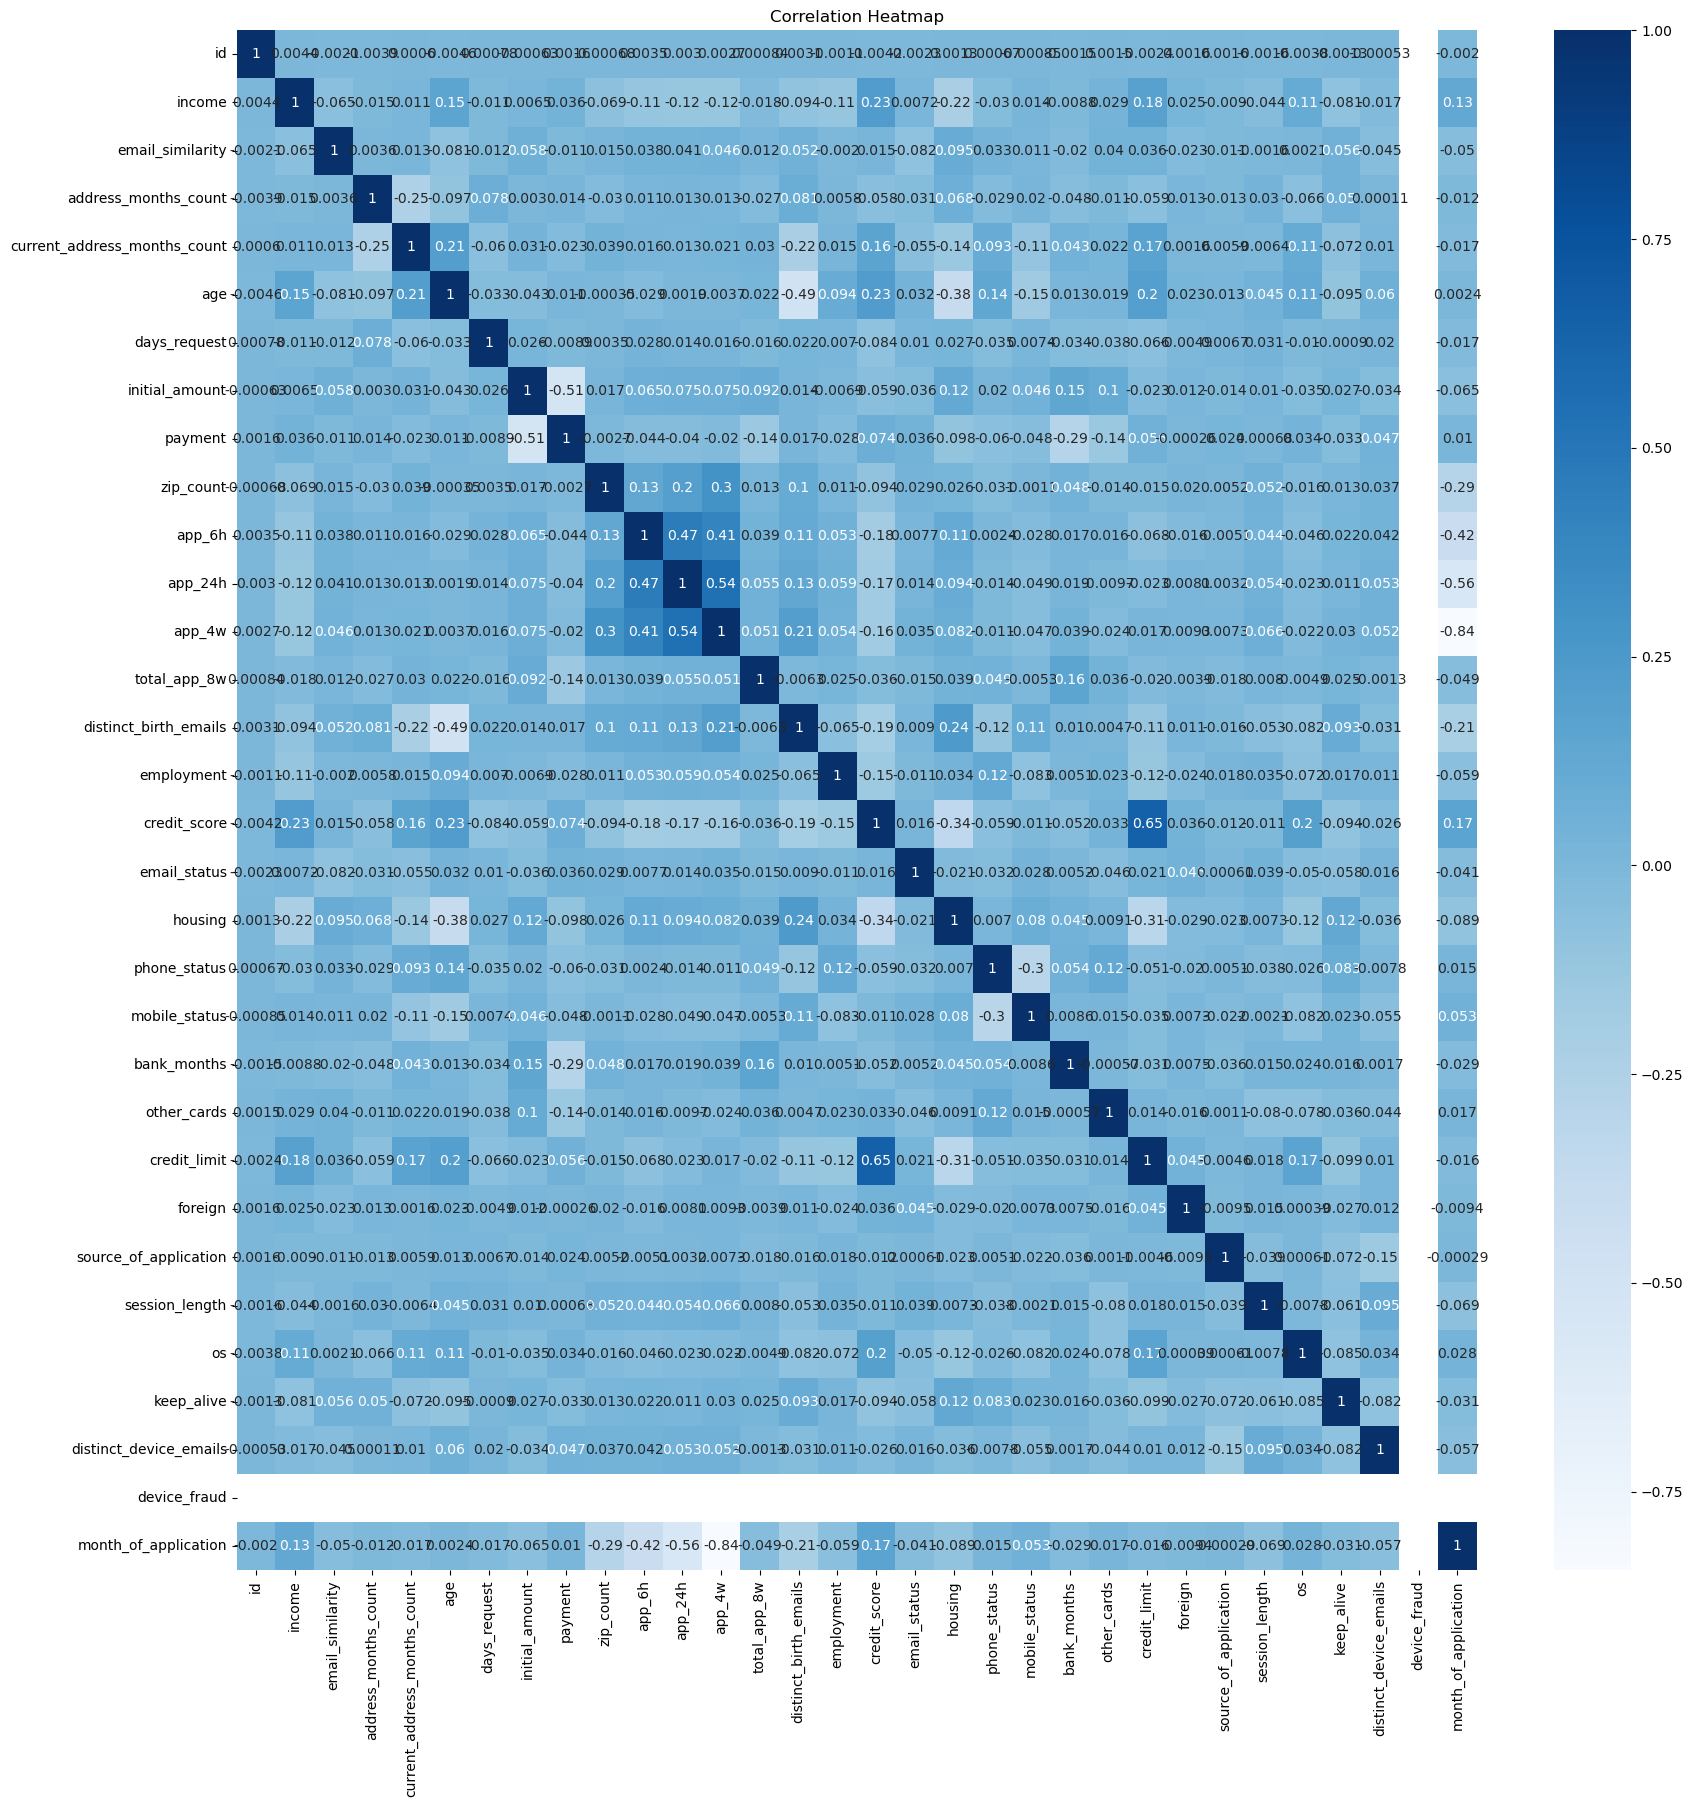

In [46]:
# Calculate the correlation matrix
corr_matrix = df_test.corr()
# Plot the correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

# DATA PREPROCESSING

In [47]:
dftest_clean = df_test.copy()

In [48]:
dftest_clean

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application
0,1023691,0.2,0.902738,-1,94,20.0,0.012972,-0.696217,3.0,1890.0,9145.627240,7545.282661,5611.397155,1337.0,12.0,0.0,118.0,1.0,NaN,0.0,1.0,1.0,0.0,200.0,0.0,0.0,NaN,3.0,1.0,1.0,0.0,2.0
1,1023692,0.8,0.068936,12,7,80.0,0.002745,-1.749271,2.0,3360.0,3420.361344,4806.102811,4267.817743,0.0,2.0,2.0,133.0,1.0,2.0,0.0,1.0,31.0,0.0,200.0,0.0,0.0,NaN,4.0,0.0,2.0,0.0,5.0
2,1023693,0.9,0.892004,-1,109,40.0,0.011651,-0.902890,2.0,349.0,1322.885361,2718.138703,3141.958118,0.0,8.0,0.0,311.0,0.0,0.0,0.0,1.0,-1.0,0.0,990.0,0.0,0.0,5.883192,3.0,1.0,1.0,0.0,7.0
3,1023694,0.9,0.187667,-1,34,50.0,0.018405,-0.994445,1.0,975.0,5837.567525,5553.808379,4321.857753,1792.0,3.0,2.0,125.0,1.0,1.0,1.0,0.0,2.0,1.0,200.0,0.0,0.0,6.230800,3.0,1.0,1.0,0.0,4.0
4,1023695,0.6,0.097141,-1,36,40.0,0.034658,-1.582350,3.0,3681.0,8286.889812,5503.118114,6323.894793,10.0,12.0,0.0,114.0,NaN,0.0,0.0,1.0,19.0,0.0,200.0,0.0,0.0,2.374713,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286798,1193289,0.9,0.992685,-1,65,40.0,0.020114,-0.654129,1.0,575.0,1235.991785,4589.035553,6358.144652,16.0,4.0,0.0,71.0,1.0,0.0,1.0,1.0,30.0,0.0,200.0,0.0,0.0,0.404337,2.0,0.0,1.0,0.0,5.0
286799,1144316,0.3,0.818686,-1,66,30.0,0.013522,-0.736241,1.0,726.0,3996.166709,4699.971708,4883.269371,9.0,NaN,0.0,196.0,0.0,0.0,0.0,1.0,10.0,0.0,1000.0,0.0,0.0,4.734496,1.0,1.0,1.0,0.0,4.0
286800,1101399,0.9,0.156550,-1,129,30.0,0.003886,-1.213933,1.0,1093.0,883.072714,4239.813754,4353.678740,10.0,4.0,0.0,100.0,1.0,0.0,0.0,1.0,30.0,0.0,200.0,0.0,0.0,2.312049,0.0,1.0,1.0,0.0,5.0
286801,1047136,0.9,0.356654,-1,106,40.0,0.015947,-0.581019,1.0,403.0,2851.493604,3296.784752,3946.432361,1546.0,4.0,NaN,223.0,1.0,0.0,0.0,1.0,28.0,0.0,500.0,0.0,0.0,4.976841,0.0,1.0,1.0,NaN,6.0


## Checking NA

In [49]:
data_missing_value = dftest_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,total_app_8w,12474,1.219
1,email_status,12301,1.202
2,foreign,12194,1.191
3,device_fraud,11865,1.159
4,credit_score,11548,1.128
5,month_of_application,10955,1.070
6,initial_amount,10936,1.068
7,email_similarity,10593,1.035
8,housing,10235,1.000
9,other_cards,10221,0.998


In [50]:
col_missing_value = data_missing_value['feature'].tolist() 
dftest_clean[col_missing_value].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286803 entries, 0 to 286802
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   total_app_8w            274329 non-null  float64
 1   email_status            274502 non-null  float64
 2   foreign                 274609 non-null  float64
 3   device_fraud            274938 non-null  float64
 4   credit_score            275255 non-null  float64
 5   month_of_application    275848 non-null  float64
 6   initial_amount          275867 non-null  float64
 7   email_similarity        276210 non-null  float64
 8   housing                 276568 non-null  float64
 9   other_cards             276582 non-null  float64
 10  app_6h                  276594 non-null  float64
 11  employment              276663 non-null  float64
 12  zip_count               277314 non-null  float64
 13  days_request            277455 non-null  float64
 14  income              

## Data Cleaning

In [51]:
dftest_clean.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
286798     True
286799     True
286800     True
286801     True
286802     True
Length: 286803, dtype: bool

In [52]:
dftest_clean = dftest_clean.drop_duplicates()
dftest_clean

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application
0,1023691,0.2,0.902738,-1,94,20.0,0.012972,-0.696217,3.0,1890.0,9145.627240,7545.282661,5611.397155,1337.0,12.0,0.0,118.0,1.0,NaN,0.0,1.0,1.0,0.0,200.0,0.0,0.0,NaN,3.0,1.0,1.0,0.0,2.0
1,1023692,0.8,0.068936,12,7,80.0,0.002745,-1.749271,2.0,3360.0,3420.361344,4806.102811,4267.817743,0.0,2.0,2.0,133.0,1.0,2.0,0.0,1.0,31.0,0.0,200.0,0.0,0.0,NaN,4.0,0.0,2.0,0.0,5.0
2,1023693,0.9,0.892004,-1,109,40.0,0.011651,-0.902890,2.0,349.0,1322.885361,2718.138703,3141.958118,0.0,8.0,0.0,311.0,0.0,0.0,0.0,1.0,-1.0,0.0,990.0,0.0,0.0,5.883192,3.0,1.0,1.0,0.0,7.0
3,1023694,0.9,0.187667,-1,34,50.0,0.018405,-0.994445,1.0,975.0,5837.567525,5553.808379,4321.857753,1792.0,3.0,2.0,125.0,1.0,1.0,1.0,0.0,2.0,1.0,200.0,0.0,0.0,6.230800,3.0,1.0,1.0,0.0,4.0
4,1023695,0.6,0.097141,-1,36,40.0,0.034658,-1.582350,3.0,3681.0,8286.889812,5503.118114,6323.894793,10.0,12.0,0.0,114.0,NaN,0.0,0.0,1.0,19.0,0.0,200.0,0.0,0.0,2.374713,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197790,1221481,0.9,0.880862,-1,176,30.0,0.001222,-0.268217,2.0,1315.0,9195.486853,4783.713735,4981.636814,NaN,9.0,0.0,283.0,0.0,1.0,1.0,0.0,2.0,0.0,1500.0,0.0,0.0,19.389913,3.0,0.0,1.0,0.0,3.0
197791,1221482,0.8,NaN,-1,26,20.0,0.005481,15.111592,0.0,857.0,2001.747308,4373.348117,4310.909049,21.0,13.0,1.0,179.0,1.0,2.0,1.0,1.0,21.0,1.0,1000.0,0.0,0.0,1.005055,0.0,0.0,1.0,0.0,5.0
197792,1221483,0.6,0.910509,11,12,40.0,9.201864,-1.433794,2.0,1267.0,6392.083775,5989.183667,4602.342516,NaN,11.0,0.0,122.0,1.0,2.0,1.0,1.0,20.0,0.0,200.0,NaN,0.0,20.650148,0.0,0.0,1.0,0.0,1.0
197793,1221484,0.3,0.240353,-1,223,20.0,0.002781,-1.261012,2.0,939.0,1236.779413,3230.834403,3727.771084,1.0,5.0,0.0,104.0,NaN,4.0,0.0,1.0,-1.0,0.0,200.0,NaN,0.0,4.334232,2.0,1.0,1.0,0.0,NaN


## Handling NA

In [53]:
# replace NaN with most frequent value
for col in numeric_test:
  dftest_clean[col] = dftest_clean[col].fillna(dftest_clean[col].mean())

C:\Users\putri\AppData\Local\Temp\ipykernel_11708\1073341583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_clean[col] = dftest_clean[col].fillna(dftest_clean[col].mean())


In [54]:
# replace NaN with most frequent value
for col in categorical_test:
  dftest_clean[col] = dftest_clean[col].fillna(dftest_clean[col].mode().iloc[0])

C:\Users\putri\AppData\Local\Temp\ipykernel_11708\3089056397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_clean[col] = dftest_clean[col].fillna(dftest_clean[col].mode().iloc[0])
C:\Users\putri\AppData\Local\Temp\ipykernel_11708\3089056397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_clean[col] = dftest_clean[col].fillna(dftest_clean[col].mode().iloc[0])
C:\Users\putri\AppData\Local\Temp\ipykernel_11708\3089056397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [55]:
data_missing_value_test = dftest_clean.isnull().sum().reset_index()
data_missing_value_test.columns = ['feature','missing_value']
data_missing_value_test

,feature,missing_value
0,id,0
1,income,0
2,email_similarity,0
3,address_months_count,0
4,current_address_months_count,0
5,age,0
6,days_request,0
7,initial_amount,0
8,payment,0
9,zip_count,0


In [56]:
dftest_clean['address_months_count'] = dftest_clean['address_months_count'].replace(-1, 0)


C:\Users\putri\AppData\Local\Temp\ipykernel_11708\200629596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_clean['address_months_count'] = dftest_clean['address_months_count'].replace(-1, 0)


In [57]:
dftest_clean

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,device_fraud,month_of_application
0,1023691,0.2,0.902738,0,94,20.0,0.012972,-0.696217,3.0,1890.000000,9145.627240,7545.282661,5611.397155,1337.000000,12.0,0.0,118.0,1.000000,0.0,0.0,1.0,1.0,0.0,200.0,0.000000,0.0,7.896476,3.0,1.0,1.0,0.0,2.000000
1,1023692,0.8,0.068936,12,7,80.0,0.002745,-1.749271,2.0,3360.000000,3420.361344,4806.102811,4267.817743,0.000000,2.0,2.0,133.0,1.000000,2.0,0.0,1.0,31.0,0.0,200.0,0.000000,0.0,7.896476,4.0,0.0,2.0,0.0,5.000000
2,1023693,0.9,0.892004,0,109,40.0,0.011651,-0.902890,2.0,349.000000,1322.885361,2718.138703,3141.958118,0.000000,8.0,0.0,311.0,0.000000,0.0,0.0,1.0,-1.0,0.0,990.0,0.000000,0.0,5.883192,3.0,1.0,1.0,0.0,7.000000
3,1023694,0.9,0.187667,0,34,50.0,0.018405,-0.994445,1.0,975.000000,5837.567525,5553.808379,4321.857753,1792.000000,3.0,2.0,125.0,1.000000,1.0,1.0,0.0,2.0,1.0,200.0,0.000000,0.0,6.230800,3.0,1.0,1.0,0.0,4.000000
4,1023695,0.6,0.097141,0,36,40.0,0.034658,-1.582350,3.0,3681.000000,8286.889812,5503.118114,6323.894793,10.000000,12.0,0.0,114.0,0.596702,0.0,0.0,1.0,19.0,0.0,200.0,0.000000,0.0,2.374713,2.0,0.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197790,1221481,0.9,0.880862,0,176,30.0,0.001222,-0.268217,2.0,1315.000000,9195.486853,4783.713735,4981.636814,159.949382,9.0,0.0,283.0,0.000000,1.0,1.0,0.0,2.0,0.0,1500.0,0.000000,0.0,19.389913,3.0,0.0,1.0,0.0,3.000000
197791,1221482,0.8,0.443772,0,26,20.0,0.005481,15.111592,0.0,857.000000,2001.747308,4373.348117,4310.909049,21.000000,13.0,1.0,179.0,1.000000,2.0,1.0,1.0,21.0,1.0,1000.0,0.000000,0.0,1.005055,0.0,0.0,1.0,0.0,5.000000
197792,1221483,0.6,0.910509,11,12,40.0,9.201864,-1.433794,2.0,1267.000000,6392.083775,5989.183667,4602.342516,159.949382,11.0,0.0,122.0,1.000000,2.0,1.0,1.0,20.0,0.0,200.0,0.038291,0.0,20.650148,0.0,0.0,1.0,0.0,1.000000
197793,1221484,0.3,0.240353,0,223,20.0,0.002781,-1.261012,2.0,939.000000,1236.779413,3230.834403,3727.771084,1.000000,5.0,0.0,104.0,0.596702,4.0,0.0,1.0,-1.0,0.0,200.0,0.038291,0.0,4.334232,2.0,1.0,1.0,0.0,3.423618


In [58]:
dftest_clean = dftest_clean.drop(columns='device_fraud')

In [59]:
dftest_clean

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,month_of_application
0,1023691,0.2,0.902738,0,94,20.0,0.012972,-0.696217,3.0,1890.000000,9145.627240,7545.282661,5611.397155,1337.000000,12.0,0.0,118.0,1.000000,0.0,0.0,1.0,1.0,0.0,200.0,0.000000,0.0,7.896476,3.0,1.0,1.0,2.000000
1,1023692,0.8,0.068936,12,7,80.0,0.002745,-1.749271,2.0,3360.000000,3420.361344,4806.102811,4267.817743,0.000000,2.0,2.0,133.0,1.000000,2.0,0.0,1.0,31.0,0.0,200.0,0.000000,0.0,7.896476,4.0,0.0,2.0,5.000000
2,1023693,0.9,0.892004,0,109,40.0,0.011651,-0.902890,2.0,349.000000,1322.885361,2718.138703,3141.958118,0.000000,8.0,0.0,311.0,0.000000,0.0,0.0,1.0,-1.0,0.0,990.0,0.000000,0.0,5.883192,3.0,1.0,1.0,7.000000
3,1023694,0.9,0.187667,0,34,50.0,0.018405,-0.994445,1.0,975.000000,5837.567525,5553.808379,4321.857753,1792.000000,3.0,2.0,125.0,1.000000,1.0,1.0,0.0,2.0,1.0,200.0,0.000000,0.0,6.230800,3.0,1.0,1.0,4.000000
4,1023695,0.6,0.097141,0,36,40.0,0.034658,-1.582350,3.0,3681.000000,8286.889812,5503.118114,6323.894793,10.000000,12.0,0.0,114.0,0.596702,0.0,0.0,1.0,19.0,0.0,200.0,0.000000,0.0,2.374713,2.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197790,1221481,0.9,0.880862,0,176,30.0,0.001222,-0.268217,2.0,1315.000000,9195.486853,4783.713735,4981.636814,159.949382,9.0,0.0,283.0,0.000000,1.0,1.0,0.0,2.0,0.0,1500.0,0.000000,0.0,19.389913,3.0,0.0,1.0,3.000000
197791,1221482,0.8,0.443772,0,26,20.0,0.005481,15.111592,0.0,857.000000,2001.747308,4373.348117,4310.909049,21.000000,13.0,1.0,179.0,1.000000,2.0,1.0,1.0,21.0,1.0,1000.0,0.000000,0.0,1.005055,0.0,0.0,1.0,5.000000
197792,1221483,0.6,0.910509,11,12,40.0,9.201864,-1.433794,2.0,1267.000000,6392.083775,5989.183667,4602.342516,159.949382,11.0,0.0,122.0,1.000000,2.0,1.0,1.0,20.0,0.0,200.0,0.038291,0.0,20.650148,0.0,0.0,1.0,1.000000
197793,1221484,0.3,0.240353,0,223,20.0,0.002781,-1.261012,2.0,939.000000,1236.779413,3230.834403,3727.771084,1.000000,5.0,0.0,104.0,0.596702,4.0,0.0,1.0,-1.0,0.0,200.0,0.038291,0.0,4.334232,2.0,1.0,1.0,3.423618


In [60]:
#Define X_test
X_test = dftest_clean
X_test

,id,income,email_similarity,address_months_count,current_address_months_count,age,days_request,initial_amount,payment,zip_count,app_6h,app_24h,app_4w,total_app_8w,distinct_birth_emails,employment,credit_score,email_status,housing,phone_status,mobile_status,bank_months,other_cards,credit_limit,foreign,source_of_application,session_length,os,keep_alive,distinct_device_emails,month_of_application
0,1023691,0.2,0.902738,0,94,20.0,0.012972,-0.696217,3.0,1890.000000,9145.627240,7545.282661,5611.397155,1337.000000,12.0,0.0,118.0,1.000000,0.0,0.0,1.0,1.0,0.0,200.0,0.000000,0.0,7.896476,3.0,1.0,1.0,2.000000
1,1023692,0.8,0.068936,12,7,80.0,0.002745,-1.749271,2.0,3360.000000,3420.361344,4806.102811,4267.817743,0.000000,2.0,2.0,133.0,1.000000,2.0,0.0,1.0,31.0,0.0,200.0,0.000000,0.0,7.896476,4.0,0.0,2.0,5.000000
2,1023693,0.9,0.892004,0,109,40.0,0.011651,-0.902890,2.0,349.000000,1322.885361,2718.138703,3141.958118,0.000000,8.0,0.0,311.0,0.000000,0.0,0.0,1.0,-1.0,0.0,990.0,0.000000,0.0,5.883192,3.0,1.0,1.0,7.000000
3,1023694,0.9,0.187667,0,34,50.0,0.018405,-0.994445,1.0,975.000000,5837.567525,5553.808379,4321.857753,1792.000000,3.0,2.0,125.0,1.000000,1.0,1.0,0.0,2.0,1.0,200.0,0.000000,0.0,6.230800,3.0,1.0,1.0,4.000000
4,1023695,0.6,0.097141,0,36,40.0,0.034658,-1.582350,3.0,3681.000000,8286.889812,5503.118114,6323.894793,10.000000,12.0,0.0,114.0,0.596702,0.0,0.0,1.0,19.0,0.0,200.0,0.000000,0.0,2.374713,2.0,0.0,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197790,1221481,0.9,0.880862,0,176,30.0,0.001222,-0.268217,2.0,1315.000000,9195.486853,4783.713735,4981.636814,159.949382,9.0,0.0,283.0,0.000000,1.0,1.0,0.0,2.0,0.0,1500.0,0.000000,0.0,19.389913,3.0,0.0,1.0,3.000000
197791,1221482,0.8,0.443772,0,26,20.0,0.005481,15.111592,0.0,857.000000,2001.747308,4373.348117,4310.909049,21.000000,13.0,1.0,179.0,1.000000,2.0,1.0,1.0,21.0,1.0,1000.0,0.000000,0.0,1.005055,0.0,0.0,1.0,5.000000
197792,1221483,0.6,0.910509,11,12,40.0,9.201864,-1.433794,2.0,1267.000000,6392.083775,5989.183667,4602.342516,159.949382,11.0,0.0,122.0,1.000000,2.0,1.0,1.0,20.0,0.0,200.0,0.038291,0.0,20.650148,0.0,0.0,1.0,1.000000
197793,1221484,0.3,0.240353,0,223,20.0,0.002781,-1.261012,2.0,939.000000,1236.779413,3230.834403,3727.771084,1.000000,5.0,0.0,104.0,0.596702,4.0,0.0,1.0,-1.0,0.0,200.0,0.038291,0.0,4.334232,2.0,1.0,1.0,3.423618


In [61]:
import sklearn.metrics as met
clf = RandomForestClassifier(n_estimators=100)
classifier = clf.fit(X,y)
y_prediksi = clf.predict(X_test)
y_prediksi


array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [64]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [65]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f1_score(y_test,rf_pred))

0.11414651122324691


In [66]:
''' # Mengubah numerik ke kategorikal menggunakan struktur kontrol
y_prediksi2 = []
for value in y_prediksi:
    if value == 0 :
       y_prediksi2.append("Not Fraud")
    else:
        y_prediksi2.append("Fraud")

# Tampilkan hasil
print(y_prediksi2)

'''


' # Mengubah numerik ke kategorikal menggunakan struktur kontrol\ny_prediksi2 = []\nfor value in y_prediksi:\n    if value == 0 :\n       y_prediksi2.append("Not Fraud")\n    else:\n        y_prediksi2.append("Fraud")\n\n# Tampilkan hasil\nprint(y_prediksi2)\n\n'

In [67]:
! pip install optuna

Defaulting to user installation because normal site-packages is not writeable


In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import optuna

In [71]:
def objectiverf(trial, X_train, X_test, y_train, y_test):
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }

    clf = RandomForestClassifier(n_estimators=params['n_estimators'],
                                  max_depth=params['max_depth'],
                                  min_samples_split=params['min_samples_split'],
                                  min_samples_leaf=params['min_samples_leaf'],
                                  random_state=42)

    model = clf.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    f1score = f1_score(y_test, y_pred)
    
    return f1score

In [72]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(lambda trial: objectiverf(trial, X_train, X_test, y_train, y_test), n_trials=100)

# Print the best hyperparameters and score
print('Best score:', study2.best_value)
print('Best parameters:', study2.best_params)

[I 2023-06-02 05:03:10,582] A new study created in memory with name: no-name-0949bd77-3f15-41a1-9963-de592a8ad6a6
[I 2023-06-02 05:14:30,151] Trial 0 finished with value: 0.35055931018410624 and parameters: {'n_estimators': 340, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.35055931018410624.


In [ ]:
# set the hyperparameters for the model
params = study2.best_params
lgbm_model2 = RandomForestClassifier(**params)

lgbm_model2.fit(X, y)

# Make predictions on the testing data
y2_pred = lgbm_model2.predict(X_test)

In [ ]:
# Mengubah numerik ke kategorikal menggunakan struktur kontrol
y_prediksi2 = []
for value in y2_pred:
    if value == 0 :
       y_prediksi2.append("Not Fraud")
    else:
        y_prediksi2.append("Fraud")

# Tampilkan hasil
print(y_prediksi2)

In [69]:
'''final_result = {
    'id': dftest_clean['id'],
    'fraud' : y_prediksi2
}
final = pd.DataFrame(final_result)
final
'''

"final_result = {\n    'id': dftest_clean['id'],\n    'fraud' : y_prediksi2\n}\nfinal = pd.DataFrame(final_result)\nfinal\n"

In [70]:
'''final.to_csv('D:\submissionformat6.csv')
'''

"final.to_csv('D:\\submissionformat6.csv')\n"